In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import math
from sklearn.ensemble import IsolationForest
from dbfread import DBF
import warnings
warnings.filterwarnings("ignore")

## TAXI ZONE
### clean_taxi_zones.csv
Importing the dataset as a DataFrame

In [4]:
df= pd.read_csv('ETL-Python\clean_data\clean_taxi_zone.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'ETL-Python\\clean_data\\clean_taxi_zone.csv'

### Data Dictionary:
- OBJECTID – Unique identifier or “Object ID” for each record or row in the data set.
- Shape Leng: Represents the geospatial length associated with a location.
- Shape Area: Represent the geospatial area associated with a location.
- Zone: Name of a zone or area within a specific borough.
- LocationID: It is a unique identifier.
- Borough: Name of the district within New York City.

In [ ]:
df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island


### Shape and Dimension

In [ ]:
df.shape

(263, 6)

Column Names and Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   Shape_Area  263 non-null    float64
 3   zone        263 non-null    object 
 4   LocationID  263 non-null    int64  
 5   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 12.5+ KB


In [ ]:
df.dtypes

OBJECTID        int64
Shape_Leng    float64
Shape_Area    float64
zone           object
LocationID      int64
borough        object
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      2
float64    2
object     2
Name: count, dtype: int64

### Data Information

Duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,260,0.133514,0.000422,Woodside,260,Queens
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,262,0.049064,0.000122,Yorkville East,262,Manhattan


Missing and Null Values

In [ ]:
df.isna().sum()

OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
dtype: int64

### Summary Statistics and Data Distribution


In [ ]:
df.describe(include='all')

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
count,263.000000,263.000000,263.000000,263,263.000000,263
unique,NaN,NaN,NaN,260,NaN,6
top,NaN,NaN,NaN,Governor's Island/Ellis Island/Liberty Island,NaN,Queens
freq,NaN,NaN,NaN,3,NaN,69
mean,132.000000,0.094269,0.000402,NaN,131.984791,NaN
std,76.065761,0.054594,0.000482,NaN,76.073787,NaN
min,1.000000,0.014306,0.000006,NaN,1.000000,NaN
25%,66.500000,0.054722,0.000133,NaN,66.500000,NaN
50%,132.000000,0.084341,0.000268,NaN,132.000000,NaN
75%,197.500000,0.119488,0.000480,NaN,197.500000,NaN


Distribution graph of the values of the Shape_Area and Shape_Leng columns

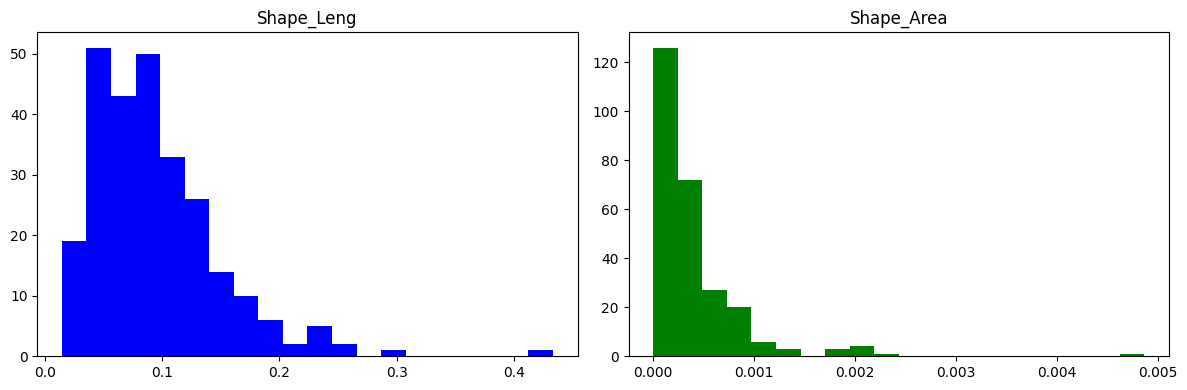

In [ ]:
# 'Shape_Leng'
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(df['Shape_Leng'], bins=20, color='blue')
plt.title('Shape_Leng')

# Visualización de la distribución de 'Shape_Area'
plt.subplot(122)
plt.hist(df['Shape_Area'], bins=20, color='green')
plt.title('Shape_Area')

plt.tight_layout()
plt.show()

Frequency table for zone and borough columns

In [ ]:
frequency_table_borough = df['borough'].value_counts().reset_index()
frequency_table_borough.columns = ['borough', 'Count']
frequency_table_zone = df['zone'].value_counts().reset_index()
frequency_table_zone.columns = ['zone', 'Count']

In [ ]:
frequency_table_borough

,borough,Count
0,Queens,69
1,Manhattan,69
2,Brooklyn,61
3,Bronx,43
4,Staten Island,20
5,EWR,1


In [ ]:
frequency_table_zone

,zone,Count
0,Governor's Island/Ellis Island/Liberty Island,3
1,Corona,2
2,Newark Airport,1
3,Oakwood,1
4,Park Slope,1
...,...,...
255,Fordham South,1
256,Forest Hills,1
257,Forest Park/Highland Park,1
258,Fort Greene,1


We use this dataset to classify trips through different areas of the city